In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.feature_selection import RFE, SelectFromModel
from sklearn.preprocessing import StandardScaler

In [4]:
from google.colab import drive #mount google drive
drive.mount('/content/drive')

Mounted at /content/drive


#Exploratory Data Analysis Statistical Interoretation and Visualizations.

In [5]:
df = pd.read_csv("/content/drive/MyDrive/Coursework/Concrete Compressive Strength.csv")

a) When and by whom was the dataset created?

The dataset was created by Nitesh Yadav around 10 months ago in kaggle.

b) How did you access the dataset?

I accessed the dataset through kaggle.

c)How does it align with the chosen UNSDG?

It is study on sustainability and housingfor all part of UNSDG.

d) List all the attributes present in the dataset.

These are all the attributes in the dataset: Cement, Blast Furnace Slag, Fly Ash, Water, Superplasticizer, Coarse Aggregate, Fine Aggregate, Age (day) and Concrete compressive strength.

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [7]:
df.info()

df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Cement                          1030 non-null   float64
 1   Blast Furnace Slag              1030 non-null   float64
 2   Fly Ash                         1030 non-null   float64
 3   Water                           1030 non-null   float64
 4   Superplasticizer                1030 non-null   float64
 5   Coarse Aggregate                1030 non-null   float64
 6   Fine Aggregate                  1030 non-null   float64
 7   Age (day)                       1030 non-null   int64  
 8   Concrete compressive strength   1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [8]:
#Check for missing values

df.isnull().sum()

#fill the missing values
for col in df.columns:
  if df[col].isnull().sum()>0:
    if df[col].dataype == 'object':
      df[col] = df[col].fillna(df[col].mode()[0])
    else:
      df[col] = df[col].fillna(df[col].mean())
print("\n Missing values after filling: ")
print(df.isnull().sum())



 Missing values after filling: 
Cement                            0
Blast Furnace Slag                0
Fly Ash                           0
Water                             0
Superplasticizer                  0
Coarse Aggregate                  0
Fine Aggregate                    0
Age (day)                         0
Concrete compressive strength     0
dtype: int64


In [9]:
df.drop_duplicates(inplace=True)

print("Basic data cleaning: ")
print(df.head())

Basic data cleaning: 
   Cement  Blast Furnace Slag  Fly Ash  Water  Superplasticizer  \
0   540.0                 0.0      0.0  162.0               2.5   
1   540.0                 0.0      0.0  162.0               2.5   
2   332.5               142.5      0.0  228.0               0.0   
3   332.5               142.5      0.0  228.0               0.0   
4   198.6               132.4      0.0  192.0               0.0   

   Coarse Aggregate  Fine Aggregate  Age (day)  Concrete compressive strength   
0            1040.0           676.0         28                       79.986111  
1            1055.0           676.0         28                       61.887366  
2             932.0           594.0        270                       40.269535  
3             932.0           594.0        365                       41.052780  
4             978.4           825.5        360                       44.296075  


In [10]:
df.dtypes #data types of the column

,0
Cement,float64
Blast Furnace Slag,float64
Fly Ash,float64
Water,float64
Superplasticizer,float64
Coarse Aggregate,float64
Fine Aggregate,float64
Age (day),int64
Concrete compressive strength,float64


In [11]:
df.var() #variance of the columns

,0
Cement,10887.879601
Blast Furnace Slag,7425.364576
Fly Ash,4122.596436
Water,455.427169
Superplasticizer,35.041179
Coarse Aggregate,6018.584052
Fine Aggregate,6454.491667
Age (day),4062.110923
Concrete compressive strength,265.194960


In [12]:
# List of columns
df.columns = df.columns.str.strip()
col = df.columns.to_list()
col

['Cement',
 'Blast Furnace Slag',
 'Fly Ash',
 'Water',
 'Superplasticizer',
 'Coarse Aggregate',
 'Fine Aggregate',
 'Age (day)',
 'Concrete compressive strength']

In [13]:
for i in col[:9]:
  print(f"{i} has values {list(df[i].unique())}")

Cement has values [540.0, 332.5, 198.6, 266.0, 380.0, 475.0, 427.5, 190.0, 304.0, 139.6, 342.0, 237.5, 349.0, 310.0, 485.0, 374.0, 313.3, 425.0, 375.0, 469.0, 388.6, 531.3, 318.8, 401.8, 362.6, 323.7, 379.5, 286.3, 439.0, 389.9, 337.9, 222.36, 233.81, 194.68, 190.68, 212.07, 229.97, 190.34, 166.09, 167.95, 213.72, 213.76, 229.68, 238.05, 250.0, 212.52, 212.57, 212.0, 231.75, 251.37, 181.38, 182.04, 168.88, 290.35, 277.05, 295.71, 251.81, 249.1, 252.31, 246.83, 275.07, 297.16, 213.74, 213.5, 277.19, 218.23, 214.9, 218.85, 376.0, 500.0, 315.0, 505.0, 451.0, 516.0, 520.0, 528.0, 385.0, 500.1, 450.1, 397.0, 333.0, 334.0, 405.0, 200.0, 145.0, 160.0, 234.0, 285.0, 356.0, 275.0, 165.0, 178.03, 167.35, 172.38, 173.54, 167.0, 173.81, 446.0, 387.0, 355.0, 491.0, 424.0, 202.0, 284.0, 359.0, 436.0, 289.0, 393.0, 480.0, 255.0, 158.8, 239.6, 238.2, 181.9, 193.5, 255.5, 272.8, 220.8, 382.5, 210.7, 295.8, 203.5, 381.4, 228.0, 316.1, 135.7, 238.1, 339.2, 290.2, 170.3, 186.2, 252.5, 339.0, 236.0, 277.0,

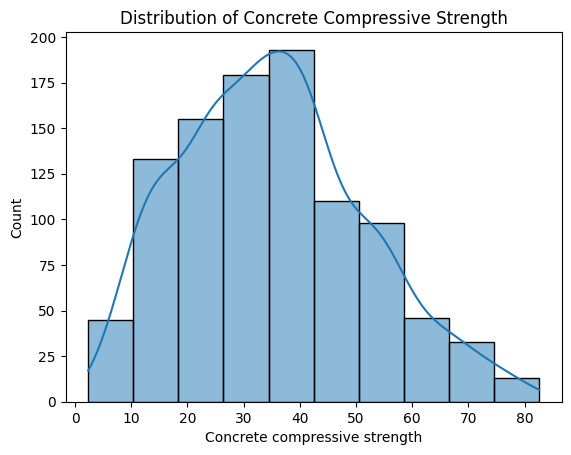

In [14]:
sns.histplot(df["Concrete compressive strength"],bins=10,kde=True)
plt.title("Distribution of Concrete Compressive Strength")
plt.show()

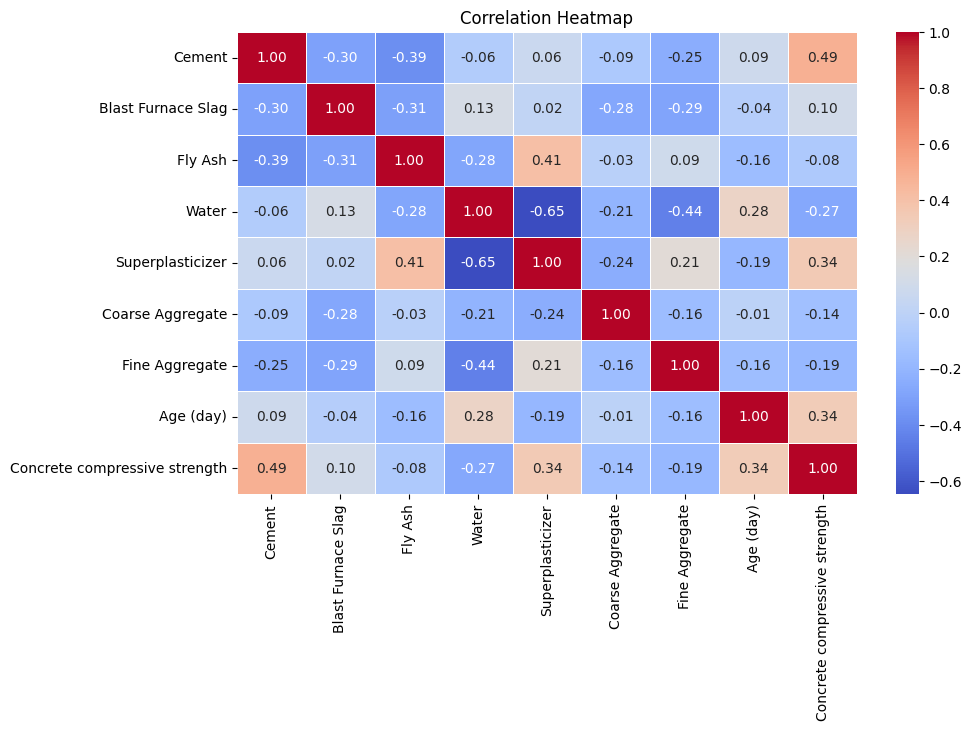

In [15]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot= True, cmap='coolwarm',fmt='.2f', linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()

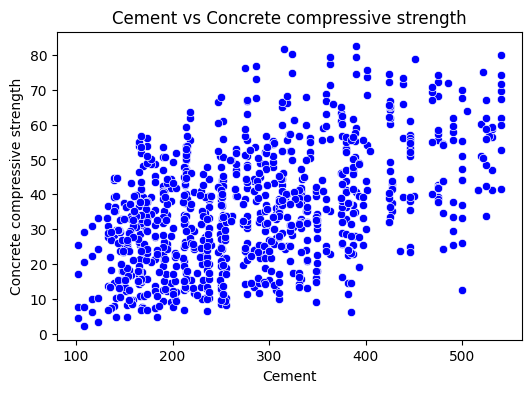

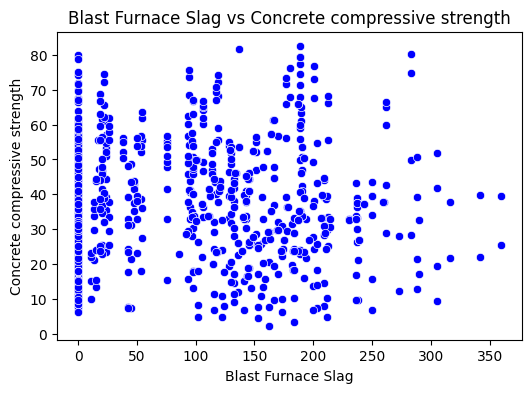

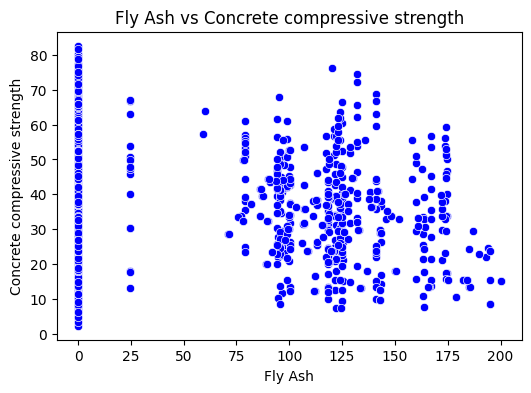

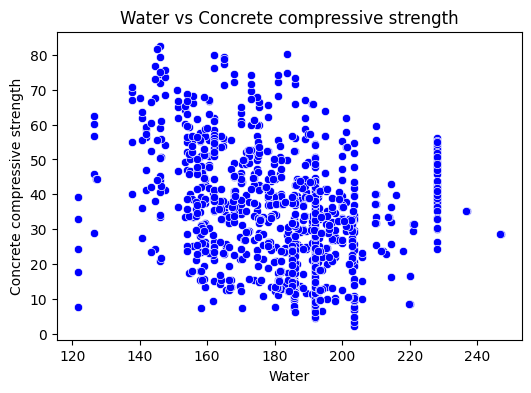

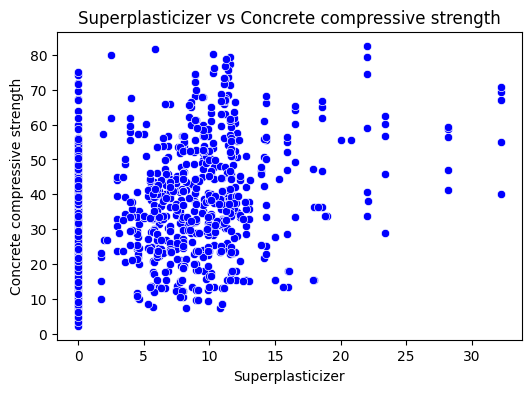

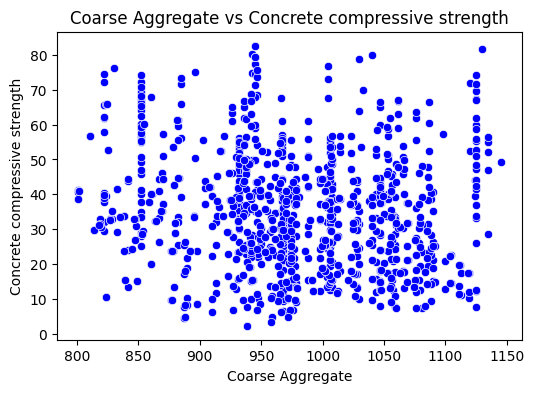

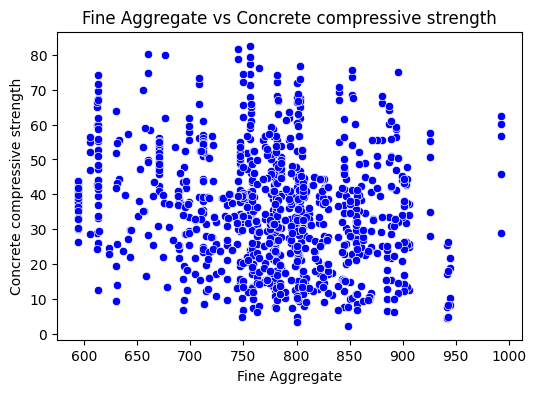

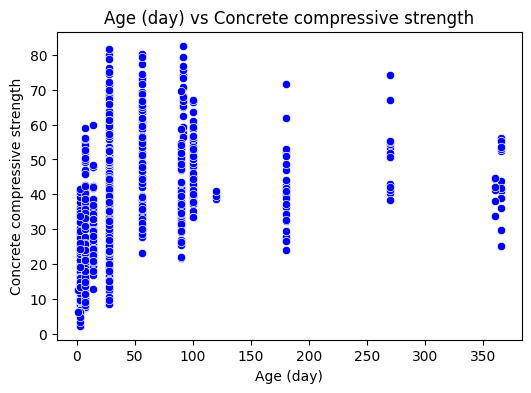

In [16]:
# List of features
features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age (day)']
target = 'Concrete compressive strength'

# Create scatter plots for each feature against the target variable
for feature in features:
    plt.figure(figsize=(6, 4))
    sns.scatterplot(
        x=feature,
        y=target,
        data=df,
        color='blue'
    )
    plt.title(f'{feature} vs {target}')
    plt.xlabel(feature)
    plt.ylabel(target)
    plt.show()

In [17]:
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075
...,...,...,...,...,...,...,...,...,...
1025,276.4,116.0,90.3,179.6,8.9,870.1,768.3,28,44.284354
1026,322.2,0.0,115.6,196.0,10.4,817.9,813.4,28,31.178794
1027,148.5,139.4,108.6,192.7,6.1,892.4,780.0,28,23.696601
1028,159.1,186.7,0.0,175.6,11.3,989.6,788.9,28,32.768036


#Ridge Regression

In [18]:
# Prepare data for modeling
X = df.drop(columns=['Concrete compressive strength'])
y = df['Concrete compressive strength']

# Standardize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# Model 1: Ridge Regression using scikit-learn
ridge_model = Ridge()
ridge_model.fit(X_train, y_train)
y_test_pred_ridge = ridge_model.predict(X_test)

mae_ridge, rmse_ridge, r2_ridge = mean_absolute_error(y_test, y_test_pred_ridge), np.sqrt(mean_squared_error(y_test, y_test_pred_ridge)), r2_score(y_test, y_test_pred_ridge)
print("Model 1: Ridge Regression")
print(f"MAE: {mae_ridge:.4f}, RMSE: {rmse_ridge:.4f}, R-squared: {r2_ridge:.4f}")

Model 1: Ridge Regression
MAE: 8.8983, RMSE: 11.1943, R-squared: 0.5800


#Random Forest

In [20]:
# Model 2: Random Forest using scikit-learn
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42)
random_forest_model.fit(X_train, y_train)
y_test_pred_rf = random_forest_model.predict(X_test)

mae_rf, rmse_rf, r2_rf = mean_absolute_error(y_test, y_test_pred_rf), np.sqrt(mean_squared_error(y_test, y_test_pred_rf)), r2_score(y_test, y_test_pred_rf)
print("Model 2: Random Forest")
print(f"MAE: {mae_rf:.4f}, RMSE: {rmse_rf:.4f}, R-squared: {r2_rf:.4f}")

Model 2: Random Forest
MAE: 3.4478, RMSE: 5.1637, R-squared: 0.9106


#Hyper-parameter Optimization and feature selection

In [21]:
# Hyperparameter tuning for Ridge Regression
param_grid_ridge = {'alpha': [0.01, 0.1, 1.0, 10.0, 100.0]}
grid_search_ridge = GridSearchCV(estimator=ridge_model, param_grid=param_grid_ridge, cv=5, scoring='r2')
grid_search_ridge.fit(X_train, y_train)
best_params_ridge = grid_search_ridge.best_params_
print("Best hyperparameters for Ridge Regression: ", best_params_ridge)

Best hyperparameters for Ridge Regression:  {'alpha': 1.0}


In [22]:
# Hyperparameter tuning for Random Forest
param_dist_rf = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
random_search_rf = RandomizedSearchCV(estimator=random_forest_model, param_distributions=param_dist_rf, n_iter=50, cv=5, scoring='r2', random_state=42)
random_search_rf.fit(X_train, y_train)
best_params_rf = random_search_rf.best_params_
print("Best hyperparameters for Random Forest: ", best_params_rf)

Best hyperparameters for Random Forest:  {'n_estimators': 300, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': 30}


In [23]:
# Feature selection for Ridge Regression
rfe_ridge = RFE(estimator=Ridge(alpha=best_params_ridge['alpha']), n_features_to_select=6)
rfe_ridge.fit(X_train, y_train)
selected_features_ridge = rfe_ridge.support_
feature_names = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Coarse Aggregate', 'Fine Aggregate', 'Age (day)']
selected_feature_names_ridge = [feature for feature, selected in zip(feature_names, selected_features_ridge) if selected]
print("Best features for Ridge Regression: ", selected_feature_names_ridge)

Best features for Ridge Regression:  ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer', 'Age (day)']


In [24]:
# Feature selection for Random Forest
rf_model = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)
rf_model.fit(X_train, y_train)
sfm_rf = SelectFromModel(rf_model, threshold="median")
sfm_rf.fit(X_train, y_train)
selected_features_rf = sfm_rf.get_support()
selected_feature_names_rf = [feature for feature, selected in zip(feature_names, selected_features_rf) if selected]
print("Best features for Random Forest: ", selected_feature_names_rf)

Best features for Random Forest:  ['Cement', 'Water', 'Superplasticizer', 'Age (day)']


#Model Evaluation and Final Model

In [25]:
# Evaluate models
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    r2 = r2_score(y_true, y_pred)
    return mae, rmse, r2

# Evaluate Ridge Regression with best hyperparameters and selected features
selected_feature_indices_ridge = [feature_names.index(feature) for feature in selected_feature_names_ridge]
X_train_best_features_ridge = X_train[:, selected_feature_indices_ridge]
X_test_best_features_ridge = X_test[:, selected_feature_indices_ridge]
ridge_model_best = Ridge(alpha=best_params_ridge['alpha'])
ridge_model_best.fit(X_train_best_features_ridge, y_train)
y_test_pred_best_ridge = ridge_model_best.predict(X_test_best_features_ridge)
mae_best_ridge, rmse_best_ridge, r2_best_ridge = evaluate_model(y_test, y_test_pred_best_ridge)

print("Ridge Regression with Best Hyperparameters and Selected Features:")
print(f"MAE: {mae_best_ridge:.4f}, RMSE: {rmse_best_ridge:.4f}, R-squared: {r2_best_ridge:.4f}")

Ridge Regression with Best Hyperparameters and Selected Features:
MAE: 8.8902, RMSE: 11.1948, R-squared: 0.5799


In [26]:
# Evaluate Random Forest with best hyperparameters and selected features
selected_feature_indices_rf = [feature_names.index(feature) for feature in selected_feature_names_rf]
X_train_best_features_rf = X_train[:, selected_feature_indices_rf]
X_test_best_features_rf = X_test[:, selected_feature_indices_rf]
rf_model_best = RandomForestRegressor(
    n_estimators=best_params_rf['n_estimators'],
    max_depth=best_params_rf['max_depth'],
    min_samples_split=best_params_rf['min_samples_split'],
    min_samples_leaf=best_params_rf['min_samples_leaf'],
    random_state=42
)
rf_model_best.fit(X_train_best_features_rf, y_train)
y_test_pred_best_rf = rf_model_best.predict(X_test_best_features_rf)
mae_best_rf, rmse_best_rf, r2_best_rf = evaluate_model(y_test, y_test_pred_best_rf)

print("Random Forest with Best Hyperparameters and Selected Features:")
print(f"MAE: {mae_best_rf:.4f}, RMSE: {rmse_best_rf:.4f}, R-squared: {r2_best_rf:.4f}")

Random Forest with Best Hyperparameters and Selected Features:
MAE: 4.7498, RMSE: 6.5598, R-squared: 0.8558


In [27]:
# Compare the models
if r2_best_rf > r2_best_ridge:
    print("\nConclusion: The final Random Forest model with selected features and optimized hyperparameters performed better.")
    final_model = rf_model_best
    final_model_name = "Random Forest"
    final_mae, final_rmse, final_r2 = mae_best_rf, rmse_best_rf, r2_best_rf
else:
    print("\nConclusion: The final Ridge regression model with selected features and optimized hyperparameters performed better.")
    final_model = ridge_model_best
    final_model_name = "Ridge Regression"
    final_mae, final_rmse, final_r2 = mae_best_ridge, rmse_best_ridge, r2_best_ridge

print(f"\nFinal Model: {final_model_name}")
print(f"MAE: {final_mae:.4f}, RMSE: {final_rmse:.4f}, R-squared: {final_r2:.4f}")


Conclusion: The final Random Forest model with selected features and optimized hyperparameters performed better.

Final Model: Random Forest
MAE: 4.7498, RMSE: 6.5598, R-squared: 0.8558
